<h1>Different timeperiods umap analysis </h1>
This notebook contains a detailed analysis of the individual k-means clusters after the UMAP transformation. It is clear to us that it is difficult to interpret the different clusters and data points statically, as there is a lack of flexibility to examine data points spontaneously. For this reason, the dashboard was developed. In this respect, this notebook can be described as a turning point in our work. 


In [58]:
import time
import pandas as pd
import umap.umap_ as umap
import umap.utils
import umap.plot
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from pandas.plotting import table
import seaborn as sns
from tabulate import tabulate

from IPython.core.display import display, HTML


<h1> Analysis UMAP dimension reduction with different time periods  </h1>

In [27]:
dataset_names = ["data_400bc", "data_200bc", "data_0bc", "data_0ad", "data_200ad"]
dataset_dict = dict()
coin_dict = dict()
for name in dataset_names:
    dataset_dict[name] = pd.read_csv(f"..\\timeperiod\\{name}.csv", sep=";")
    coin_dict[name] = dataset_dict[name]["coin"]
    del dataset_dict[name]["coin"]
    del dataset_dict[name]["Unnamed: 0"]

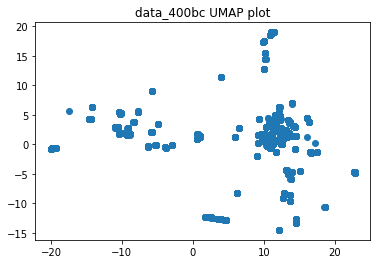

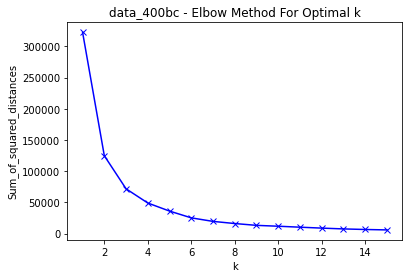

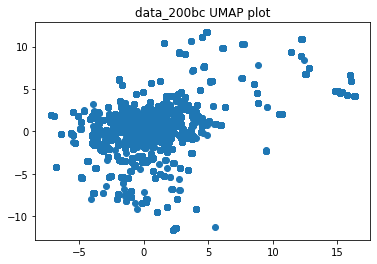

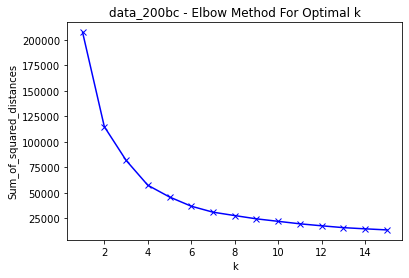

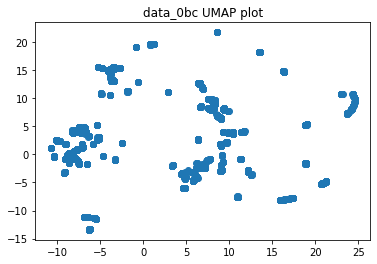

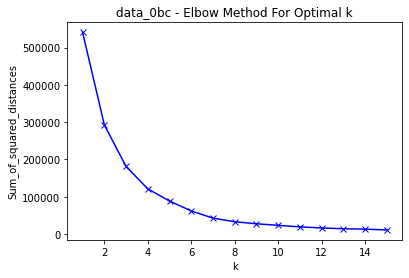

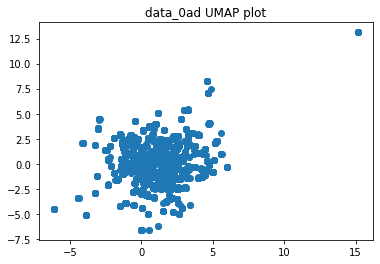

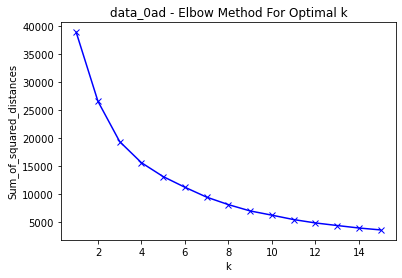

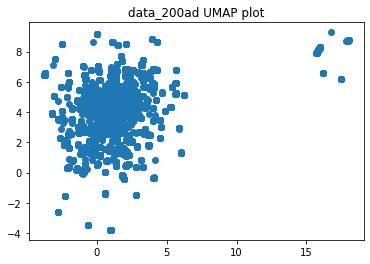

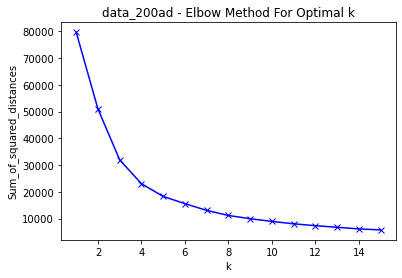

In [9]:
for dataset in dataset_dict.keys():
    tmp_dataset = dataset_dict[dataset]
    plt.scatter(tmp_dataset["x"], tmp_dataset["y"])
    plt.title(f"{dataset} UMAP plot")
    plt.show()
    Sum_of_squared_distances = list()
    K = range(1,16)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(tmp_dataset)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title(f'{dataset} - Elbow Method For Optimal k')
    plt.show()

<h1> Select optimal k for different time periods </h1>

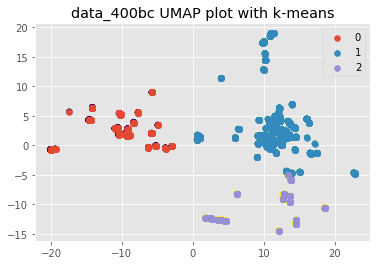

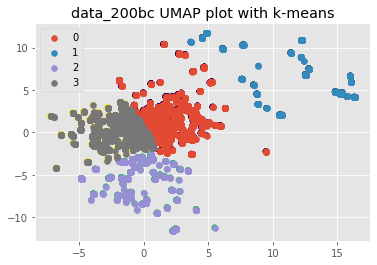

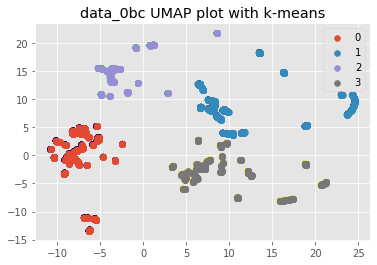

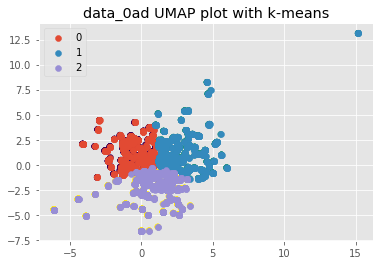

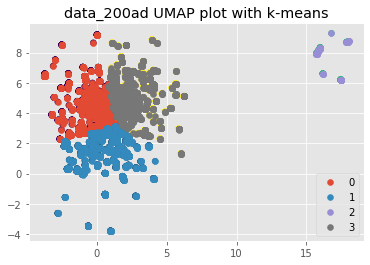

In [28]:
k_dict = dict()
k_dict["data_400bc"] = 3
k_dict["data_200bc"] = 4
k_dict["data_0bc"] = 4
k_dict["data_0ad"] = 3
k_dict["data_200ad"] = 4
plt.style.use('ggplot')
for dataset in dataset_dict.keys():
    tmp_dataset = dataset_dict[dataset]
    km = KMeans(n_clusters=k_dict[dataset])
    km = km.fit(tmp_dataset)
    dataset_dict[dataset]["coin"] = coin_dict[dataset]
    dataset_dict[dataset]["label"] = km.labels_
    plt.scatter(tmp_dataset["x"], tmp_dataset["y"], c=km.labels_ )
    for i in set(km.labels_):
        plt.scatter(dataset_dict[dataset][dataset_dict[dataset]["label"] == i]["x"] , dataset_dict[dataset][dataset_dict[dataset]["label"] == i]["y"] , label = i)
    plt.title(f"{dataset} UMAP plot with k-means")
    plt.legend()
    plt.show()





In [29]:
def prepare_data(data):
    data["weight"] = [float(str(x).replace(",",".")) for x in data["weight"]]
    data["mint"] = [x.replace("http://nomisma.org/id/", "") for x in data["mint"]]
    data["coin"] = [x.split("#coins?id=")[1] for x in data["coin"]]
    data["material"] = [x.replace("http://nomisma.org/id/", "") for x in data["material"]]
    data["denom"] = [x.replace("http://nomisma.org/id/", "") for x in data["denom"]]
    data["findspot"] = [str(x).replace("file:///C:/Users/karsten/Documents/uni/ProgrammeWorkspace/D2RServer/d2rq-0.8.1_CNT/dump_2021_03_16.rdf#", "") \
                        for x in data["findsport"]]
    data["authority"] = [x.replace(" http://nomisma.org/id/", "") for x in data["authority"]]
    categorial_vars = ["material", "denom", "mint", "collection", "weightstand_engl", "findsport", "authority", "peculiarities_engl" ]
    
    for var in categorial_vars:
        data[var] = data[var].astype('category')
        
    try:
        data['weight'] = pd.to_numeric(data['weight'],errors='coerce')
        try:
            data['maxdiam'] = pd.to_numeric(data['maxdiam'],errors='coerce')
            try: 
                data['mindiam'] = pd.to_numeric(data['mindiam'],errors='coerce')
                try:
                    data['weight'].astype(float)
                except:
                    pass
            except:
                pass
        except:
            pass
    except:
        pass
        
    return data


In [55]:
coin_data = pd.read_csv("C:\\Users\\fredi\\Desktop\\Uni\\Data Challanges\\CN\\data\\queryResults_semikolon.csv", sep=";")
coin_data = prepare_data(coin_data)
coin_data["coin"] = coin_data["coin"].astype(int)
def get_full_dataset(coins):
    return coin_data[coin_data["coin"].isin(coins)]

In [40]:
def descriptive_analysis(data):
    features = ['startdate', 'enddate', 'weight',\
        'mindiam', 'maxdiam', 'axis', 'material', 'mint',\
        'denom', 'collection', 'weightstand_engl', 'findsport', 'authority']
    data_sub = data[features]
    for i in ['category', 'number', 'object']:
        try:
            print(tabulate(np.round(data_sub.describe(include=i)), headers='keys', tablefmt='psql'))
        except:
            break
    mint_agg = data.groupby("mint")["enddate"].count().reset_index()
    mint_agg = mint_agg.rename(columns={"enddate": "count"})
    mint_agg = mint_agg.sort_values("count")
    #means_weight.append(data["weight"].mean())
    #means_mindiam.append(data["mindiam"].mean())
    #means_maxdiam.append(data["maxdiam"].mean())
    #means_axis.append(data["axis"].mean())
    print(mint_agg.tail(10))
    f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
    sns.set_theme(style="whitegrid")
    dates = data_sub[['startdate', 'enddate']]
    sns.boxplot(data=dates, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
    sns.boxplot(data=dates, orient="h", palette="Set2", ax=axes[1])
    plt.show()
    f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
    sns.set_theme(style="whitegrid")
    weight = data_sub[['weight']]
    sns.boxplot(data=weight, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
    sns.boxplot(data=weight, orient="h", palette="Set2", ax=axes[1])
    plt.show()
    f, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5)) 
    sns.set_theme(style="whitegrid")
    diam = data_sub[['mindiam', 'maxdiam']]
    sns.boxplot(data=diam, orient="h", palette="Set2", showfliers=False, ax=axes[0])  # no outliers
    sns.boxplot(data=diam, orient="h", palette="Set2", ax=axes[1])
    plt.show()
    f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
    sns.set_theme(style="whitegrid")
    sns.histplot(data=data_sub, x='material', ax=axes[0])
    sns.histplot(y='weightstand_engl', data=data_sub, ax=axes[1])
    plt.show()

In [114]:
features = ['startdate', 'enddate', 'weight',\
        'mindiam', 'maxdiam', 'axis', 'material', 'mint',\
        'denom', 'collection', 'weightstand_engl', 'findsport', 'authority']
def get_subset_dataset(data, label):
    tmp_coins = get_coins(data, label)
    tmp_full_data = get_full_dataset(tmp_coins)
    tmp_full_data = tmp_full_data[features]
    return tmp_full_data
def compare_different_cluster(data):
    labels = set(data["label"].to_list())
    display(HTML(f'<h2>Category var analysis</h2>'))
    for label in labels:
        tmp_full_data = get_subset_dataset(data, label)
        display(HTML(f'<h4>Label: {label} </h4>'))
        print(tabulate(np.round(tmp_full_data.describe(include="category")), headers='keys', tablefmt='psql'))
    display(HTML(f'<h2>Mint analysis</h2>'))
    mint_df = pd.DataFrame()
    for label in labels:
        tmp_full_data = get_subset_dataset(data, label)
        mint_agg = tmp_full_data.groupby("mint")["enddate"].count().reset_index()
        mint_agg = mint_agg.rename(columns={"enddate": "count"})
        mint_agg = mint_agg.sort_values("count", ascending=False)
        mint_agg = mint_agg.head(10)
        mint_agg = mint_agg.reset_index()
        mint_df[f"{label} mint"] = mint_agg["mint"]
        mint_df[f"{label} freq"] = mint_agg["count"]
    display(mint_df)
    display(HTML(f'<h2>Numeric var analysis</h2>'))
    for label in labels:
        tmp_full_data = get_subset_dataset(data, label)
        display(HTML(f'<h4>Label: {label} </h4>'))
        print(tabulate(np.round(tmp_full_data.describe(include="number")), headers='keys', tablefmt='psql'))
    display(HTML(f'<h2>Category (CatI) analysis</h2>'))
    category_df = pd.DataFrame()
    for label in labels:
        tmp_coins = get_coins(data, label)
        tmp_cat = get_entity_top20_catI(tmp_coins)
        category_df[f"{label}"] = tmp_cat["Cat_I"]
        category_df[f"{label} freq"] = tmp_cat["count"]
    display(category_df)
    display(HTML(f'<h2>Entity analysis</h2>'))
    entity_df = pd.DataFrame()
    for label in labels:
        tmp_coins = get_coins(data, label)
        tmp_entity = get_top20_entitys(tmp_coins)
        #print(type(tmp_entity))
        entity_names = tmp_entity.index
        entity_df[f"{label}"] = [x.replace("entity_", "") for x in entity_names]
        entity_df[f"{label} freq"] = tmp_entity.values
    print(entity_df)
        

In [87]:
def show_different_cluster(data, dataset):
    plt.figure(figsize=(16, 8)) 
    for i in set(data["label"]):
        plt.scatter(data[data["label"] == i]["x"] , data[data["label"] == i]["y"] , label = i)
    plt.title(f"{dataset} UMAP plot with k-means")
    plt.legend()
    plt.show()

In [33]:
entity_dummys = pd.read_csv("..\\2021_06_01_DC_NLP_CNT\\design_dummys.csv", sep=";")
del entity_dummys["Unnamed: 0"]
def get_entitys(coins):
    return entity_dummys[entity_dummys["id_coin"].isin(coins)]
    

In [74]:
def get_top20_entitys(coins):
    entitys = get_entitys(coins)
    del entitys["id_coin"]
    #print(entitys.sum().sort_values(ascending=False).head(20))
    return entitys.sum().sort_values(ascending=False).head(20)

In [113]:
entity_cat_data = pd.read_csv("..\\2021_06_01_DC_NLP_CNT\\design_data2_cat_v2.csv", sep=";")
entity_cat_data.columns
entity_cat_data = entity_cat_data[entity_cat_data["Label_Entity"]!="VERBS"]
def get_entity_top20_catI(coins):
    tmp_data = entity_cat_data[entity_cat_data["id_coin"].isin(coins)]
    catI = tmp_data.groupby("Cat_I")["id_coin"].count().reset_index()
    catI = catI.rename(columns={"id_coin": "count"})
    catI = catI.sort_values("count", ascending=False)
    return catI.head(20).reset_index()

In [68]:
def get_coins(data, label):
    tmp_data = data[data["label"]==label]
    tmp_coins = tmp_data["coin"].to_list()
    return [int(x) for x in tmp_coins]
    

In [94]:
def analyze_clusters(data):
    labels = set(data["label"].to_list())
    for label in labels:
        tmp_coins = get_coins(data, label)
        full_dataset = get_full_dataset(tmp_coins)
        display(HTML(f'<h2>Label - {label}</h2>'))
        descriptive_analysis(full_dataset)
        get_top20_entitys(tmp_coins)
    for label in labels:
        tmp_coins = get_coins(data, label)
        

Dataset shape: (2320, 4)


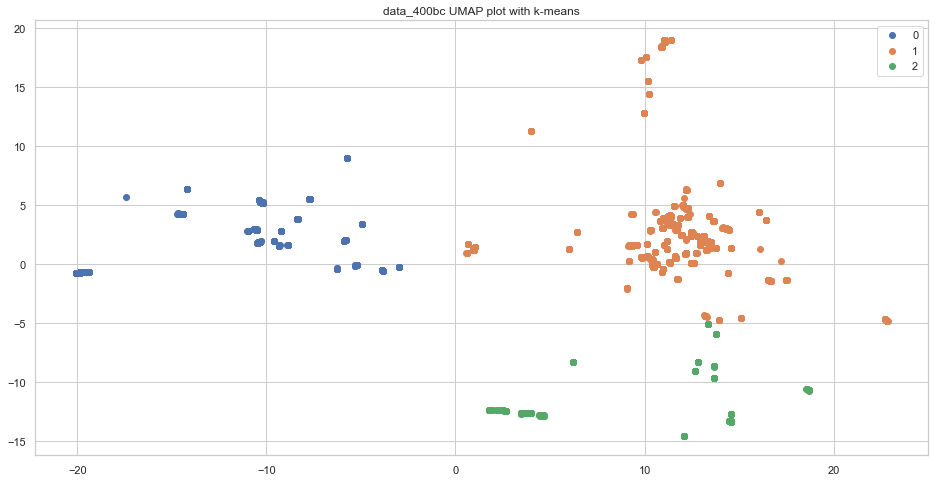

+--------+------------+---------+--------------+--------------+--------------------+-------------+-------------+
|        | material   | mint    | denom        | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+---------+--------------+--------------+--------------------+-------------+-------------|
| count  | 505        | 505     | 505          | 505          | 505                | 505         | 505         |
| unique | 1          | 4       | 4            | 273          | 2                  | 1           | 1           |
| top    | el         | cyzicus | sixth-stater |              |                    |             |             |
| freq   | 505        | 491     | 239          | 233          | 503                | 505         | 505         |
+--------+------------+---------+--------------+--------------+--------------------+-------------+-------------+


+--------+------------+--------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint   | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+--------+---------+--------------+--------------------+-------------+-------------|
| count  | 1499       | 1499   | 1499    | 1499         | 1499               | 1499        | 1499        |
| unique | 6          | 29     | 22      | 1356         | 13                 | 7           | 3           |
| top    | ar         |        | stater  |              |                    |             |             |
| freq   | 1377       | 268    | 280     | 144          | 446                | 1486        | 1467        |
+--------+------------+--------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+--------+-------------+--------------+--------------------+-------------+-------------+
|        | material   | mint   | denom       | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+--------+-------------+--------------+--------------------+-------------+-------------|
| count  | 316        | 316    | 316         | 316          | 316                | 316         | 316         |
| unique | 1          | 10     | 11          | 282          | 7                  | 2           | 1           |
| top    | ar         | aenus  | tetradrachm |              | Persian            |             |             |
| freq   | 316        | 135    | 94          | 35           | 134                | 315         | 316         |
+--------+------------+--------+-------------+--------------+--------------------+-------------+-------------+


,0 mint,0 freq,1 mint,1 freq,2 mint,2 freq
0,cyzicus,491,,268,aenus,135
1,abydus,6,maroneia,246,abdera_thrace,97
2,dardanus,6,aenus,190,thasos,42
3,dicaea_thrace,2,abdera_thrace,130,cebren,13
4,,0,cyzicus,128,parium,12
5,nicopolis_ad_istrum,0,dicaea_thrace,103,maroneia,7
6,perinthus,0,selymbria,76,,3
7,pergamum,0,thasos,74,chersonesus_thrace,3
8,pautalia,0,cebren,74,tenedos,3
9,parium,0,abydus,44,pitane,1


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         505 |       505 |      505 |        18 |       164 |      0 |
| mean  |        -541 |      -472 |        7 |        15 |        14 |    nan |
| std   |          33 |        28 |        7 |         5 |         5 |    nan |
| min   |        -600 |      -550 |        1 |         6 |         6 |    nan |
| 25%   |        -550 |      -475 |        3 |        16 |        10 |    nan |
| 50%   |        -550 |      -475 |        3 |        18 |        11 |    nan |
| 75%   |        -550 |      -475 |       16 |        19 |        19 |    nan |
| max   |        -430 |      -400 |       23 |        19 |        25 |    nan |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        1499 |      1499 |     1499 |       546 |       849 |    328 |
| mean  |        -470 |      -441 |        8 |        16 |        16 |      7 |
| std   |          37 |        30 |        9 |         7 |         7 |      4 |
| min   |        -600 |      -550 |        0 |         5 |         6 |      1 |
| 25%   |        -500 |      -470 |        1 |        11 |        11 |      3 |
| 50%   |        -475 |      -450 |        3 |        15 |        15 |      6 |
| 75%   |        -440 |      -410 |       14 |        21 |        21 |      9 |
| max   |        -400 |      -400 |       41 |        39 |        39 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         316 |       316 |      316 |        67 |       193 |     76 |
| mean  |        -467 |      -444 |        9 |        20 |        20 |      6 |
| std   |          22 |        17 |        6 |         6 |         6 |      3 |
| min   |        -525 |      -472 |        0 |         9 |         6 |      1 |
| 25%   |        -475 |      -452 |        3 |        15 |        14 |      3 |
| 50%   |        -471 |      -450 |        9 |        21 |        22 |      6 |
| 75%   |        -455 |      -433 |       16 |        25 |        24 |      9 |
| max   |        -429 |      -400 |       17 |        28 |        30 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


,0,0 freq,1,1 freq,2,2 freq
0,Fish,456,BodyParts,458,Male,155
1,BodyParts,135,Bird,368,BodyParts,152
2,Mamal,82,Mamal,363,Mamal,135
3,Clothing,60,Male,324,Bird,99
4,Bird,43,Fish,131,Clothing,7
5,Female,35,Clothing,84,Architecture,3
6,Male,30,Architecture,58,Arms,3
7,Arms,19,Tools,39,Female,3
8,Architecture,18,Reptile,31,Insect,3
9,Tools,11,Arms,24,Interieur-Furniture,3


               0  0 freq             1  1 freq            2  2 freq
0   Thunfisch     456     Kopf          456     Kopf         152   
1   Kopf          130     Petasos       268     Hermes       144   
2   Hund          33      Hermes        268     Petasos      141   
3   Helm          31      Pferdes       169     Ziegenbock   132   
4   Greif         28      Ziegenbock    166     Greif        97    
5   Löwe          26      Hahn          156     Pan          11    
6   Teilquadrate  22      Pferd         138     Kerykeion    7     
7   Athena        19      Greif         138     Pferdes      6     
8   Stier         18      Thunfisch     130     Athena       3     
9   Bogen         15      Herakles      96      Helm         3     
10  Kranz         12      Löwenfell     93      Thron        3     
11  Eber          11      Weinrebe      87      Doppelspeer  3     
12  Geweih        11      Adler         72      Pferd        3     
13  Gewand        10      Doppelspeer   60      

Dataset shape: (8382, 4)


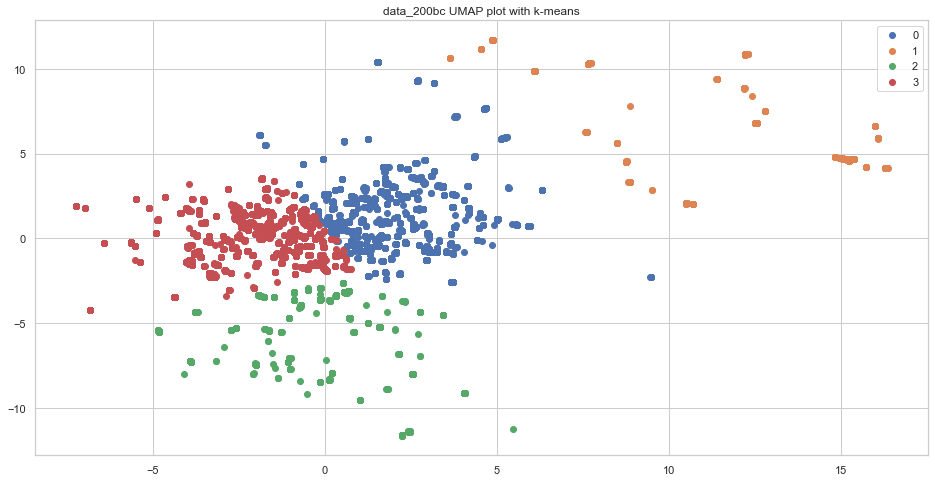

+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint      | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+-----------+---------+--------------+--------------------+-------------+-------------|
| count  | 3344       | 3344      | 3344    | 3344         | 3344               | 3344        | 3344        |
| unique | 5          | 66        | 26      | 3261         | 15                 | 16          | 18          |
| top    | ar         | byzantium |         |              |                    |             |             |
| freq   | 1705       | 537       | 1468    | 84           | 2192               | 3320        | 3178        |
+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+----------+-------------+--------------+--------------------+-------------+-------------+
|        | material   | mint     | denom       | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+----------+-------------+--------------+--------------------+-------------+-------------|
| count  | 518        | 518      | 518         | 518          | 518                | 518         | 518         |
| unique | 5          | 11       | 5           | 381          | 6                  | 6           | 4           |
| top    | ar         | maroneia | tetradrachm |              |                    |             |             |
| freq   | 302        | 98       | 196         | 138          | 294                | 512         | 369         |
+--------+------------+----------+-------------+--------------+--------------------+-------------+-------------+


+--------+------------+--------------------+------------+--------------+--------------------+-------------+-------------+
|        | material   | mint               | denom      | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+--------------------+------------+--------------+--------------------+-------------+-------------|
| count  | 841        | 841                | 841        | 841          | 841                | 841         | 841         |
| unique | 2          | 14                 | 10         | 835          | 8                  | 5           | 3           |
| top    | ar         | chersonesus_thrace | hemidrachm |              | Persian            |             |             |
| freq   | 749        | 211                | 319        | 7            | 266                | 822         | 839         |
+--------+------------+--------------------+------------+--------------+--------------------+-------------+-------------+


+--------+------------+-------------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint        | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+-------------+---------+--------------+--------------------+-------------+-------------|
| count  | 3679       | 3679        | 3679    | 3679         | 3679               | 3679        | 3679        |
| unique | 4          | 67          | 23      | 3643         | 9                  | 8           | 16          |
| top    | ae         | cherronesus |         |              |                    |             |             |
| freq   | 2883       | 465         | 2424    | 37           | 3070               | 3542        | 3523        |
+--------+------------+-------------+---------+--------------+--------------------+-------------+-------------+


,0 mint,0 freq,1 mint,1 freq,2 mint,2 freq,3 mint,3 freq
0,byzantium,537,maroneia,98,chersonesus_thrace,211,cherronesus,465
1,maroneia,327,pergamum,90,byzantium,147,byzantium,286
2,aenus,230,cyzicus,74,abdera_thrace,145,abdera_thrace,263
3,abdera_thrace,224,lampsacus,70,abydus,129,cardia,228
4,lysimachia,147,atarneus,47,maroneia,110,abydus,201
5,pergamum,140,odessus,45,aenus,37,lysimachia,187
6,abydus,116,lysimachia,44,lysimachia,34,,145
7,,105,sestus,38,sigeum,17,cebren,134
8,chersonesus_thrace,99,orthagoreia_thrace,8,scamandria,4,maroneia,102
9,cardia,91,samothrace,3,thasos,2,gargara,102


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        3344 |      3344 |     3344 |      1156 |      2211 |   1641 |
| mean  |        -353 |      -304 |        5 |        17 |        17 |      8 |
| std   |          59 |        56 |        5 |         5 |         6 |      4 |
| min   |        -500 |      -399 |        0 |         5 |         5 |      1 |
| 25%   |        -390 |      -347 |        2 |        13 |        12 |      6 |
| 50%   |        -357 |      -300 |        3 |        17 |        16 |     10 |
| 75%   |        -301 |      -275 |        8 |        22 |        22 |     12 |
| max   |        -200 |      -200 |       17 |        35 |        35 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         518 |       518 |      518 |       172 |       251 |    117 |
| mean  |        -338 |      -304 |       11 |        17 |        20 |      9 |
| std   |          55 |        51 |        6 |         4 |         6 |      4 |
| min   |        -410 |      -365 |        1 |         9 |        12 |      1 |
| 25%   |        -387 |      -350 |        4 |        14 |        15 |      5 |
| 50%   |        -350 |      -330 |       16 |        16 |        17 |     12 |
| 75%   |        -297 |      -261 |       17 |        18 |        28 |     12 |
| max   |        -200 |      -200 |       18 |        33 |        35 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         841 |       841 |      841 |       328 |       537 |    199 |
| mean  |        -361 |      -333 |        3 |        15 |        15 |      7 |
| std   |          31 |        33 |        2 |         2 |         3 |      4 |
| min   |        -411 |      -386 |        1 |         8 |         8 |      1 |
| 25%   |        -365 |      -341 |        2 |        14 |        13 |      4 |
| 50%   |        -357 |      -325 |        3 |        15 |        15 |      7 |
| 75%   |        -350 |      -320 |        4 |        17 |        17 |     12 |
| max   |        -276 |      -250 |       10 |        24 |        24 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        3679 |      3679 |     3679 |       920 |      2328 |   1867 |
| mean  |        -356 |      -314 |        3 |        16 |        15 |      8 |
| std   |          39 |        52 |        3 |         4 |         4 |      4 |
| min   |        -450 |      -399 |        0 |         7 |         6 |      1 |
| 25%   |        -385 |      -350 |        1 |        12 |        11 |      6 |
| 50%   |        -357 |      -311 |        2 |        15 |        14 |      9 |
| 75%   |        -347 |      -300 |        4 |        20 |        18 |     12 |
| max   |        -200 |      -200 |       21 |        29 |        30 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


,0,0 freq,1,1 freq,2,2 freq,3,3 freq
0,BodyParts,2197,BodyParts,342.0,BodyParts,571.0,BodyParts,2381
1,Clothing,955,Arms,336.0,Male,303.0,Male,1095
2,Female,929,Female,264.0,Bird,275.0,Clothing,850
3,Male,755,Clothing,191.0,Interieur-Furniture,23.0,Female,711
4,Arms,505,Male,96.0,Clothing,19.0,Bird,615
5,Mamal,482,Fish,65.0,Female,18.0,Mamal,532
6,Bird,457,Ornaments,54.0,Mamal,15.0,Ornaments,506
7,Ornaments,285,Reptile,44.0,Insect,3.0,Arms,386
8,Architecture,97,Architecture,21.0,Shellfish,2.0,Architecture,107
9,NauticalObject,93,Tools,20.0,Ornaments,1.0,NauticalObject,58


               0  0 freq                     1  1 freq             2  2 freq             3  3 freq
0   Kopf          2182    Kopf                  338     Kopf          571     Kopf          2309  
1   Lorbeerkranz  526     Pferdes               210     Lorbeerkranz  244     Lorbeerkranz  1026  
2   Helm          409     Athena                164     Löwen         240     Apollon       700   
3   Athena        374     Schild                160     Apollon       240     Helm          349   
4   Delphin       371     Speer                 160     Delphin       146     Pferd         302   
5   Apollon       352     Weintraube            104     Rind          146     Greif         287   
6   Pferd         269     Ranken                98      Greif         145     Athena        279   
7   Petasos       257     Lorbeerkranz          95      Adler         128     Delphin       235   
8   Greif         239     Diadem                87      Ranken        109     Ährenkranz    204   
9   Rind  

Dataset shape: (3738, 4)


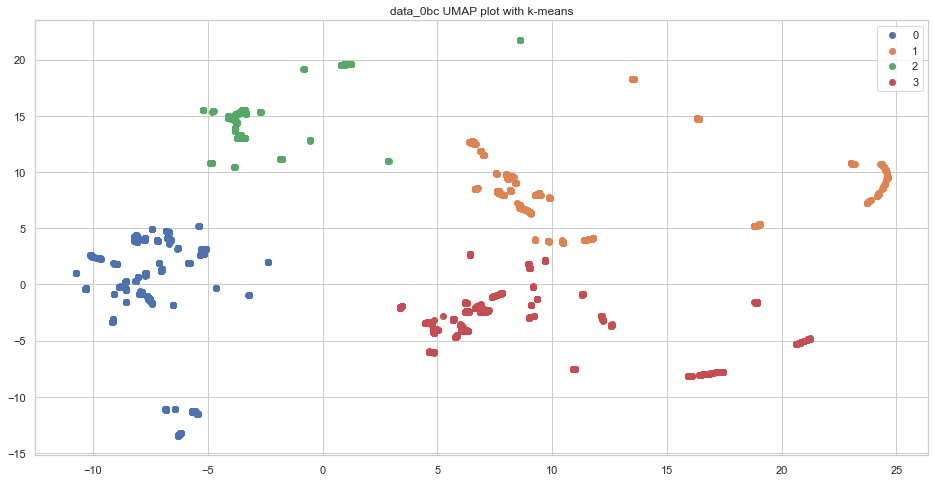

+--------+------------+----------+-------------+--------------+--------------------+-------------+-------------+
|        | material   | mint     | denom       | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+----------+-------------+--------------+--------------------+-------------+-------------|
| count  | 1191       | 1191     | 1191        | 1191         | 1191               | 1191        | 1191        |
| unique | 3          | 20       | 12          | 1154         | 5                  | 9           | 9           |
| top    | ar         | pergamum | tetradrachm |              |                    |             |             |
| freq   | 946        | 358      | 628         | 38           | 955                | 1094        | 1090        |
+--------+------------+----------+-------------+--------------+--------------------+-------------+-------------+


+--------+------------+----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint     | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+----------+---------+--------------+--------------------+-------------+-------------|
| count  | 971        | 971      | 971     | 971          | 971                | 971         | 971         |
| unique | 3          | 26       | 4       | 933          | 1                  | 2           | 7           |
| top    | ae         | pergamum |         |              |                    |             |             |
| freq   | 714        | 467      | 710     | 39           | 971                | 966         | 783         |
+--------+------------+----------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint     | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+----------+---------+--------------+--------------------+-------------+-------------|
| count  | 512        | 512      | 512     | 512          | 512                | 512         | 512         |
| unique | 2          | 17       | 7       | 448          | 1                  | 1           | 2           |
| top    | ae         | maroneia |         |              |                    |             |             |
| freq   | 492        | 231      | 437     | 65           | 512                | 512         | 511         |
+--------+------------+----------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint     | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+----------+---------+--------------+--------------------+-------------+-------------|
| count  | 1064       | 1064     | 1064    | 1064         | 1064               | 1064        | 1064        |
| unique | 3          | 20       | 3       | 1045         | 5                  | 3           | 1           |
| top    | ae         | maroneia |         |              |                    |             |             |
| freq   | 851        | 459      | 854     | 20           | 904                | 1059        | 1064        |
+--------+------------+----------+---------+--------------+--------------------+-------------+-------------+


,0 mint,0 freq,1 mint,1 freq,2 mint,2 freq,3 mint,3 freq
0,pergamum,358,pergamum,467,maroneia,231,maroneia,459
1,mesembria,185,adramyteum,124,abdera_thrace,51,pergamum,236
2,maroneia,112,lampsacus,57,callatis,51,thasos,81
3,thasos,104,aenus,51,imbros,46,perinthus,65
4,abydus,86,maroneia,47,hephaestia,29,samothrace,64
5,,78,abydus,37,abydus,27,sestus,62
6,byzantium,65,,36,apollonia_pontica,19,tenedos,22
7,adramyteum,53,parium,33,odessus,16,priapus,15
8,odessus,27,mesembria,31,byzantium,15,mesembria,13
9,samothrace,24,gargara,21,mesembria,8,poimanenum,12


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        1191 |      1191 |     1191 |       384 |       812 |    592 |
| mean  |        -150 |      -105 |       12 |        27 |        27 |     10 |
| std   |          59 |        51 |        5 |         7 |         7 |      3 |
| min   |        -300 |      -198 |        1 |         7 |         9 |      1 |
| 25%   |        -189 |      -148 |       11 |        23 |        23 |     11 |
| 50%   |        -168 |      -100 |       15 |        30 |        30 |     12 |
| 75%   |        -100 |       -65 |       16 |        31 |        32 |     12 |
| max   |           0 |         0 |       35 |        39 |        41 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         971 |       971 |      971 |       168 |       586 |    468 |
| mean  |        -172 |       -97 |        8 |        18 |        19 |     10 |
| std   |          49 |        56 |        5 |         4 |         5 |      4 |
| min   |        -241 |      -197 |        1 |        10 |         9 |      1 |
| 25%   |        -200 |      -100 |        4 |        15 |        16 |     11 |
| 50%   |        -175 |       -90 |        6 |        17 |        18 |     12 |
| 75%   |        -133 |       -56 |       12 |        20 |        22 |     12 |
| max   |         -19 |        -1 |       19 |        26 |        34 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         512 |       512 |      512 |       119 |       331 |    175 |
| mean  |        -256 |      -117 |        4 |        15 |        15 |      8 |
| std   |          56 |        40 |        2 |         3 |         2 |      4 |
| min   |        -350 |      -190 |        1 |        10 |        10 |      1 |
| 25%   |        -280 |      -150 |        2 |        14 |        14 |      5 |
| 50%   |        -280 |      -125 |        3 |        15 |        15 |     10 |
| 75%   |        -269 |      -100 |        4 |        17 |        16 |     12 |
| max   |         -50 |         0 |       11 |        23 |        25 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        1064 |      1064 |     1064 |       275 |       823 |    459 |
| mean  |        -131 |       -36 |        9 |        22 |        23 |     10 |
| std   |          58 |        35 |        5 |         6 |         6 |      4 |
| min   |        -300 |      -100 |        0 |        11 |         8 |      1 |
| 25%   |        -180 |       -50 |        4 |        18 |        18 |     11 |
| 50%   |        -100 |       -30 |        7 |        21 |        21 |     12 |
| 75%   |        -100 |        -1 |       14 |        25 |        27 |     12 |
| max   |           0 |         0 |       21 |        35 |        38 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


,0,0 freq,1,1 freq,2,2 freq,3,3 freq
0,Clothing,1012,BodyParts,761.0,BodyParts,243.0,BodyParts,959.0
1,BodyParts,830,Clothing,607.0,Mamal,218.0,Clothing,859.0
2,Female,405,Female,382.0,Clothing,108.0,Female,411.0
3,Architecture,361,Male,281.0,Vessel-Jar,90.0,Male,153.0
4,Arms,327,Arms,256.0,Female,76.0,Bird,126.0
5,Reptile,325,Architecture,171.0,Bird,73.0,Vessel-Jar,77.0
6,Vessel-Jar,288,Reptile,134.0,Male,65.0,Tools,59.0
7,Bird,271,Ornaments,112.0,Ornaments,58.0,Arms,34.0
8,Male,212,Vessel-Jar,90.0,Arms,45.0,Bar,33.0
9,Bar,185,Tools,71.0,MusicalInstruments,9.0,Ornaments,30.0


               0  0 freq              1  1 freq             2  2 freq              3  3 freq
0   Kopf          830     Kopf           755     Kopf          240     Kopf           959   
1   Efeukranz     499     Lorbeerkranz   381     Pferd         215     Dionysos       880   
2   Köcher        347     Athena         313     Weinrebe      214     Efeukranz      426   
3   Bogen         347     Efeukranz      208     Trauben       210     Weintraube     410   
4   Schlange      325     Schild         196     Lorbeerkranz  52      Speeren        390   
5   Dionysos      308     Kranz          168     Greif         51      Athena         269   
6   Cista         264     Schlange       134     Patera        48      Helm           269   
7   Schlangen     264     Helm           124     Zweig         45      Lorbeerkranz   197   
8   Adler         263     Asklepios      117     Efeukranz     39      Palmzweig      176   
9   Löwenfell     255     Taenia         93      Thymiaterion  39     

Dataset shape: (5344, 4)


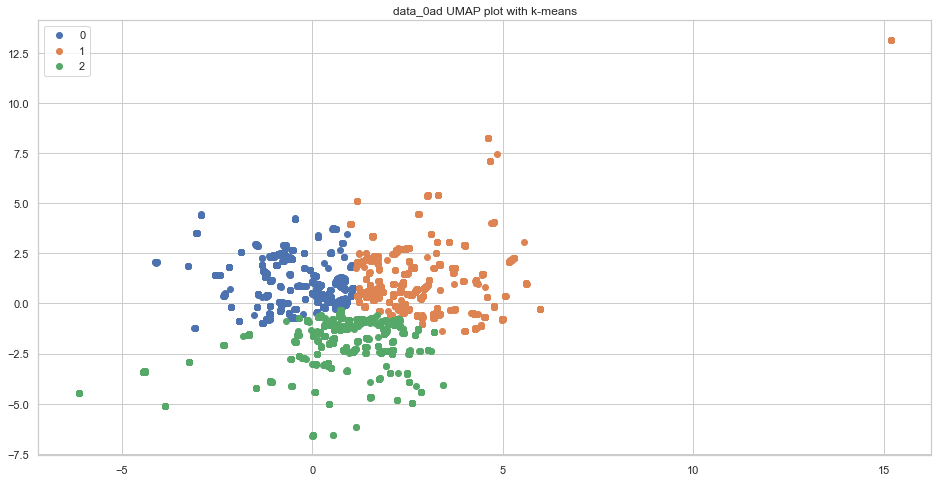

+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint          | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+---------------+---------+--------------+--------------------+-------------+-------------|
| count  | 1686       | 1686          | 1686    | 1686         | 1686               | 1686        | 1686        |
| unique | 2          | 38            | 13      | 1659         | 1                  | 13          | 4           |
| top    | ae         | philippopolis |         |              |                    |             |             |
| freq   | 1685       | 431           | 726     | 28           | 1686               | 1660        | 1630        |
+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint          | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+---------------+---------+--------------+--------------------+-------------+-------------|
| count  | 2008       | 2008          | 2008    | 2008         | 2008               | 2008        | 2008        |
| unique | 3          | 46            | 12      | 1986         | 1                  | 7           | 5           |
| top    | ae         | philippopolis |         |              |                    |             |             |
| freq   | 1987       | 901           | 680     | 23           | 2008               | 2000        | 1993        |
+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint          | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+---------------+---------+--------------+--------------------+-------------+-------------|
| count  | 1650       | 1650          | 1650    | 1650         | 1650               | 1650        | 1650        |
| unique | 3          | 39            | 13      | 1585         | 2                  | 20          | 5           |
| top    | ae         | philippopolis |         |              |                    |             |             |
| freq   | 1576       | 448           | 787     | 66           | 1633               | 1613        | 1535        |
+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+


,0 mint,0 freq,1 mint,1 freq,2 mint,2 freq
0,philippopolis,431,philippopolis,901,philippopolis,448
1,perinthus,196,byzantium,178,perinthus,277
2,byzantium,173,hadrianopolis_thrace,125,,127
3,cyzicus,130,perinthus,115,pergamum,115
4,pergamum,130,pergamum,84,topirus,110
5,augusta_trajana,122,germe,70,cyzicus,90
6,bizya,63,pautalia,54,byzantium,73
7,,55,imbros,49,tomis,45
8,adramyteum,50,coela,39,augusta_trajana,43
9,abydus,49,serdica,38,perperene,35


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        1686 |      1686 |     1686 |       734 |      1046 |    811 |
| mean  |         118 |       137 |        7 |        23 |        23 |      8 |
| std   |          60 |        55 |        5 |         6 |         5 |      3 |
| min   |         -50 |        12 |        1 |         9 |         9 |      1 |
| 25%   |         102 |       117 |        3 |        17 |        18 |      6 |
| 50%   |         138 |       161 |        5 |        24 |        23 |      6 |
| 75%   |         161 |       176 |       10 |        27 |        26 |     12 |
| max   |         200 |       200 |       29 |        36 |        36 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        2008 |      2008 |     2008 |       604 |      1056 |    920 |
| mean  |         139 |       163 |        9 |        23 |        23 |      7 |
| std   |          55 |        45 |        7 |         7 |         7 |      4 |
| min   |        -100 |         1 |        1 |        11 |        10 |      1 |
| 25%   |         138 |       161 |        4 |        18 |        19 |      6 |
| 50%   |         160 |       176 |        6 |        22 |        23 |      6 |
| 75%   |         177 |       192 |       14 |        28 |        28 |     11 |
| max   |         198 |       200 |       64 |        47 |        48 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        1650 |      1650 |     1650 |       577 |       950 |    761 |
| mean  |         105 |       132 |        6 |        21 |        21 |      7 |
| std   |          67 |        62 |        4 |         5 |         4 |      3 |
| min   |        -168 |         2 |        1 |        13 |        13 |      1 |
| 25%   |          63 |        81 |        4 |        18 |        18 |      6 |
| 50%   |         118 |       161 |        4 |        20 |        20 |      6 |
| 75%   |         154 |       192 |        7 |        24 |        23 |     11 |
| max   |         199 |       200 |       28 |        35 |        36 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


,0,0 freq,1,1 freq,2,2 freq
0,Male,1378,Male,1670,Male,1324
1,BodyParts,1014,Clothing,1342,BodyParts,1064
2,Clothing,927,BodyParts,935,Clothing,756
3,Female,491,Female,746,Female,547
4,Vessel-Jar,328,Vessel-Jar,470,Vessel-Jar,353
5,Arms,247,Arms,333,Arms,306
6,Architecture,226,Architecture,272,Architecture,127
7,Tools,216,Tools,172,Tools,103
8,Bar,111,Ornaments,127,Ornaments,77
9,Ornaments,75,Mamal,112,Bar,72


                 0  0 freq               1  1 freq               2  2 freq
0   Kopf            1013    Brustbild       1067    Kopf            1061  
1   Lorbeerkranz    723     Kopf            928     Lorbeerkranz    652   
2   Brustbild       649     Lorbeerkranz    914     Brustbild       542   
3   Paludamentum    346     Paludamentum    525     Gewand          266   
4   Panzer          324     Panzer          514     Patera          252   
5   Gewand          256     Gewand          466     Antoninus Pius  237   
6   Patera          241     Commodus        372     Paludamentum    177   
7   Antoninus Pius  218     Patera          358     Panzer          164   
8   Commodus        176     Antoninus Pius  338     Augustus        158   
9   Augustus        163     Füllhorn        218     Dionysos        155   
10  Fackel          161     Helm            174     Füllhorn        148   
11  Marc Aurel      154     Apollon         153     Commodus        132   
12  Hadrian         137  

Dataset shape: (8046, 4)


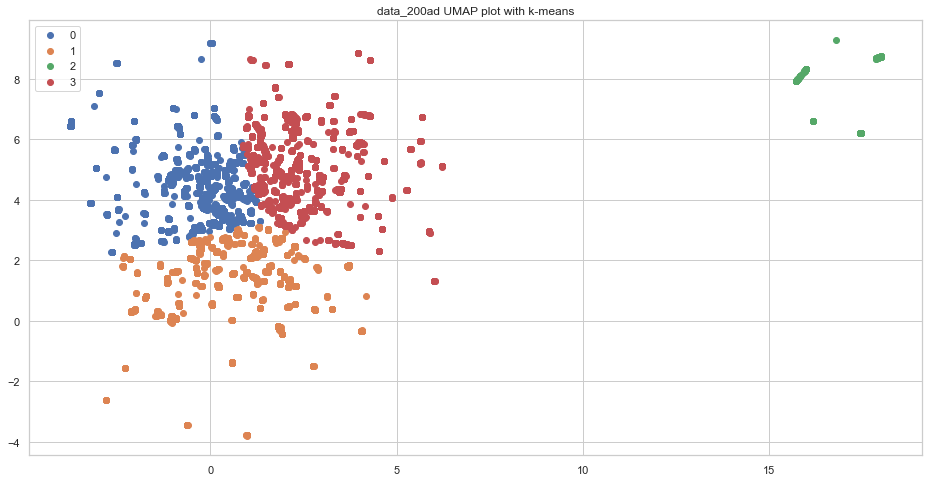

+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint      | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+-----------+---------+--------------+--------------------+-------------+-------------|
| count  | 2766       | 2766      | 2766    | 2766         | 2766               | 2766        | 2766        |
| unique | 1          | 49        | 8       | 2636         | 1                  | 24          | 4           |
| top    | ae         | perinthus |         |              |                    |             |             |
| freq   | 2766       | 515       | 1286    | 131          | 2766               | 2713        | 2655        |
+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint          | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+---------------+---------+--------------+--------------------+-------------+-------------|
| count  | 2035       | 2035          | 2035    | 2035         | 2035               | 2035        | 2035        |
| unique | 2          | 34            | 11      | 1862         | 1                  | 21          | 3           |
| top    | ae         | philippopolis |         |              |                    |             |             |
| freq   | 2015       | 502           | 606     | 174          | 2035               | 2005        | 2030        |
+--------+------------+---------------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint      | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+-----------+---------+--------------+--------------------+-------------+-------------|
| count  | 110        | 110       | 110     | 110          | 110                | 110         | 110         |
| unique | 2          | 10        | 5       | 92           | 4                  | 1           | 1           |
| top    | ae         | byzantium |         |              |                    |             |             |
| freq   | 106        | 52        | 55      | 19           | 106                | 110         | 110         |
+--------+------------+-----------+---------+--------------+--------------------+-------------+-------------+


+--------+------------+-----------------+---------+--------------+--------------------+-------------+-------------+
|        | material   | mint            | denom   | collection   | weightstand_engl   | findsport   | authority   |
|--------+------------+-----------------+---------+--------------+--------------------+-------------+-------------|
| count  | 3135       | 3135            | 3135    | 3135         | 3135               | 3135        | 3135        |
| unique | 4          | 44              | 11      | 2897         | 3                  | 22          | 4           |
| top    | ae         | augusta_trajana | 5-unit  |              |                    |             |             |
| freq   | 3015       | 506             | 875     | 239          | 3133               | 3102        | 3065        |
+--------+------------+-----------------+---------+--------------+--------------------+-------------+-------------+


,0 mint,0 freq,1 mint,1 freq,2 mint,2 freq,3 mint,3 freq
0,perinthus,515,philippopolis,502,byzantium,52,augusta_trajana,506
1,philippopolis,397,perinthus,266,callatis,32,philippopolis,313
2,hadrianopolis_thrace,313,byzantium,201,hephaestia,12,marcianopolis,255
3,pergamum,154,marcianopolis,171,abydus,6,deultum,251
4,deultum,137,deultum,135,alexandreia_troas,2,byzantium,230
5,marcianopolis,116,nicopolis_ad_istrum,85,maroneia,2,hadrianopolis_thrace,156
6,byzantium,100,anchialus,71,tenedos,1,trajanopolis_thrace,142
7,nicopolis_ad_nestum,90,hadrianopolis_thrace,71,chersonesus_thrace,1,serdica,124
8,alexandreia_troas,82,augusta_trajana,70,lemnos,1,anchialus,101
9,serdica,74,topirus,66,serdica,1,bizya,93


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        2766 |      2766 |     2766 |      1049 |      1850 |   1428 |
| mean  |         217 |       227 |       14 |        28 |        28 |      6 |
| std   |          19 |        16 |       10 |         7 |         7 |      4 |
| min   |         150 |       201 |        1 |        13 |        13 |      1 |
| 25%   |         197 |       217 |        7 |        24 |        24 |      6 |
| 50%   |         217 |       218 |       11 |        26 |        26 |      6 |
| 75%   |         238 |       244 |       17 |        32 |        30 |      7 |
| max   |         300 |       300 |       93 |        45 |        60 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        2035 |      2035 |     2035 |       795 |      1157 |    915 |
| mean  |         211 |       222 |       10 |        24 |        25 |      7 |
| std   |          17 |        13 |        7 |         5 |         5 |      4 |
| min   |         187 |       204 |        1 |        12 |        12 |      1 |
| 25%   |         193 |       211 |        5 |        21 |        21 |      6 |
| 50%   |         209 |       217 |        9 |        24 |        24 |      7 |
| 75%   |         222 |       235 |       14 |        28 |        28 |      9 |
| max   |         253 |       268 |       40 |        42 |        45 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |         110 |       110 |      110 |        53 |        70 |     37 |
| mean  |          51 |       300 |        5 |        20 |        20 |      6 |
| std   |         120 |        24 |        2 |         2 |         2 |      4 |
| min   |        -480 |       238 |        1 |        15 |        15 |      1 |
| 25%   |         100 |       299 |        4 |        20 |        19 |      5 |
| 50%   |         100 |       300 |        5 |        21 |        21 |      6 |
| 75%   |         100 |       300 |        6 |        21 |        22 |      8 |
| max   |         100 |       425 |       16 |        23 |        29 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


+-------+-------------+-----------+----------+-----------+-----------+--------+
|       |   startdate |   enddate |   weight |   mindiam |   maxdiam |   axis |
|-------+-------------+-----------+----------+-----------+-----------+--------|
| count |        3135 |      3135 |     3135 |      1366 |      2109 |   1467 |
| mean  |         214 |       224 |       12 |        26 |        27 |      6 |
| std   |          19 |        15 |        7 |         5 |         5 |      4 |
| min   |         101 |       201 |        1 |        12 |        12 |      1 |
| 25%   |         197 |       212 |        7 |        23 |        24 |      5 |
| 50%   |         211 |       217 |       12 |        28 |        27 |      6 |
| 75%   |         238 |       241 |       15 |        30 |        30 |      7 |
| max   |         320 |       330 |       43 |        44 |        46 |     12 |
+-------+-------------+-----------+----------+-----------+-----------+--------+


,0,0 freq,1,1 freq,2,2 freq,3,3 freq
0,Male,2416,Clothing,1511,Clothing,85.0,Male,2902
1,Clothing,2047,Male,1422,BodyParts,53.0,Clothing,2495
2,Female,1022,BodyParts,698,Bush,32.0,BodyParts,1394
3,BodyParts,959,Female,690,Female,23.0,Female,1054
4,Vessel-Jar,797,Vessel-Jar,601,Arms,22.0,Vessel-Jar,967
5,Arms,728,Arms,454,Leaves,20.0,Arms,644
6,Architecture,597,Architecture,377,Male,9.0,Architecture,621
7,Bar,239,Tools,181,Architecture,8.0,Tools,349
8,Tools,233,Ornaments,145,Mamal,8.0,Bar,277
9,Mamal,209,Bar,137,Ornaments,6.0,Ornaments,260


                    0  0 freq                  1  1 freq           2  2 freq                  3  3 freq
0   Lorbeerkranz       1577    Lorbeerkranz       1153    Weintraube  55      Lorbeerkranz       2030  
1   Brustbild          1559    Brustbild          1130    Kopf        53      Brustbild          1821  
2   Panzer             1196    Panzer             764     Dionysos    52      Kopf               1371  
3   Paludamentum       1176    Paludamentum       740     Brustbild   42      Paludamentum       1288  
4   Kopf               931     Kopf               671     Efeukranz   36      Panzer             1267  
5   Caracalla          603     Gewand             400     Ranke       32      Caracalla          978   
6   Patera             488     Patera             364     Gewand      24      Gewand             617   
7   Gewand             428     Septimius Severus  321     Blatt       20      Patera             479   
8   Füllhorn           310     Elagabal           264     Ranken

In [115]:
pd.set_option('display.expand_frame_repr', False)

for dataset in dataset_dict.keys():
    display(HTML(f'<h1>Analysis - {dataset}</h1>'))
    tmp_dataset = dataset_dict[dataset]
    print(f"Dataset shape: {tmp_dataset.shape}")
    #for i in set(tmp_dataset["label"]):
    #    plt.scatter(tmp_dataset[tmp_dataset["label"] == i]["x"] , tmp_dataset[tmp_dataset["label"] == i]["y"] , label = i)
    #plt.title(f"{dataset} UMAP plot with k-means")
    #plt.legend()
    #plt.show()
    show_different_cluster(tmp_dataset, dataset)
    #analyze_clusters(tmp_dataset)
    compare_different_cluster(tmp_dataset)